In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Reviews.csv")

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6263 entries, 0 to 6262
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      6263 non-null   int64 
 1   ProductId               6263 non-null   object
 2   UserId                  6263 non-null   object
 3   ProfileName             6263 non-null   object
 4   HelpfulnessNumerator    6263 non-null   int64 
 5   HelpfulnessDenominator  6263 non-null   int64 
 6   Score                   6263 non-null   int64 
 7   Time                    6263 non-null   int64 
 8   Summary                 6263 non-null   object
 9   Text                    6262 non-null   object
dtypes: int64(5), object(5)
memory usage: 489.4+ KB


In [ ]:
data.describe()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,6263.0000,6263.000000,6263.000000,6263.000000,6.263000e+03
mean,3132.0000,1.591410,2.065624,4.178030,1.295220e+09
std,1808.1167,5.411248,6.075171,1.317674,4.770384e+07
min,1.0000,0.000000,0.000000,1.000000,9.617184e+08
25%,1566.5000,0.000000,0.000000,4.000000,1.271549e+09
50%,3132.0000,0.000000,1.000000,5.000000,1.309651e+09
75%,4697.5000,2.000000,2.000000,5.000000,1.330560e+09
max,6263.0000,187.000000,216.000000,5.000000,1.351210e+09


In [ ]:
data.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
data = data[data["Score"] != 3]

In [ ]:
data.Score.unique()

array([5, 1, 4, 2])

In [ ]:
# Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.
def partition(x):
    if x < 3:
        return 0
    return 1

In [ ]:
#changing reviews with score less than 3 to be positive and vice-versa
actualScore = data['Score']
positiveNegative = actualScore.map(partition) 
data['Score'] = positiveNegative
print("Number of data points in our data", data.shape)
data.head(3)

Number of data points in our data (5784, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
subset = {"UserId", "ProfileName", "Time", "Text"}
data = data.drop_duplicates(subset=subset, keep="first")
print(data.shape)
data.head(3)

(5764, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
data[data['HelpfulnessNumerator'] > data['HelpfulnessDenominator']]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [ ]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.reset_index(drop = True, inplace=True)
print(data.shape)
data.head(10)

(5764, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,1,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,1,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


1    4847
0     917
Name: Score, dtype: int64
**************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score distribution')

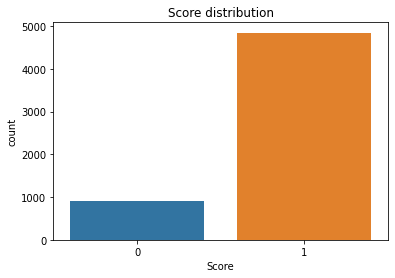

In [ ]:
#data points for each class
print(data['Score'].value_counts())
print("*"*50)

#Count plot for Score
sns.countplot('Score',data = data)
plt.title("Score distribution")

In [3]:
#set of stopwords

import ssl
import nltk

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()


import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')                      


#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

data['CleanedText'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()

(5764, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted peanuts a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great wide assortment yummy Delive...


In [ ]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)

    print("the type of count vectorizer ",type(final_array))
    print("the shape of out text BOW vectorizer ",final_array.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_array.get_shape()[1])
    
    return model_vect, final_array

In [ ]:
#split data into train, cross validate and test 
from sklearn.model_selection import train_test_split

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train
  

In [ ]:

#Normalize Data
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)

    print("Train Data Size ",train.get_shape())
    print("CV Data Size: ",cv.shape)
    print("Test Data Size: ",test.shape)
    
    return train, cv, test

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt

def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
    #############################################################################
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
    #############################################################################

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(X_cv)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]
        #############################################################################

        auc_score_cv = roc_auc_score(Y_cv,probs)            #auc roc for cv
        auc_score_train = roc_auc_score(Y_train,prob)       #auc roc for train
        #############################################################################

        print(i," ------> ",auc_score_cv)
        #############################################################################

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)
        #############################################################################

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i

    print("*"*100)
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {max_roc_auc}")
    print("*"*100)
    #############################################################################

    sns.set_style("darkgrid")
    plt.xscale('log')
    plt.plot(alpha, pred_cv,'r-', label = 'CV Data')
    plt.plot(alpha,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title(r'Auc Score v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()
    print("*"*100)
    #############################################################################

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill
    pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplt.plot(fpr, tpr, marker='.')
    pyplt.title("Line Plot of ROC Curve on Train Data")
    pyplt.ylabel('True Positive Rate')
    pyplt.xlabel('False Positive Rate')
    pyplt.show()
    print("*"*100)
    
    #############################################################################
    return best_alpha


In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    #############################################################################
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]            # keep probabilities for the positive outcome only

    #############################################################################
    roc_auc = roc_auc_score(Y_test,probs)
    print("AUC Score",roc_auc)
    print("*"*70)
    #############################################################################'

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

    #############################################################################
    prediction=bnb.predict(X_test)
    skplt.plot_confusion_matrix(Y_test,prediction)
    #############################################################################

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("*"*70)
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("*"*70)
    
    return bnb,roc_auc

    #############################################################################


In [ ]:
import scikitplot.metrics as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    #############################################################################
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]            # keep probabilities for the positive outcome only

    #############################################################################
    roc_auc = roc_auc_score(Y_test,probs)
    print("AUC Score",roc_auc)
    print("*"*70)
    #############################################################################'

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

    #############################################################################
    prediction=bnb.predict(X_test)
    skplt.plot_confusion_matrix(Y_test,prediction)
    #############################################################################

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("*"*70)
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("*"*70)
    
    return bnb,roc_auc

    #############################################################################

In [ ]:
def Important_features(model, classifier):
    neg = classifier.feature_log_prob_[0].argsort()
    pos = classifier.feature_log_prob_[1].argsort()
    top_pos_words = np.take(model.get_feature_names(),pos)
    top_neg_words = np.take(model.get_feature_names(),neg)
    imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
    imp_df['Pos_Words'] = top_pos_words[::-1]
    imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1],pos)[::-1]
    imp_df['Neg_Words'] = top_neg_words[::-1]
    imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0],neg)[::-1]
    return imp_df

In [ ]:
def Individual_Prediction(model, classifier, review):
    review = final_sentence(review)
    review_vec = model.transform([review])
    review_vec = preprocessing.normalize(review_vec)
    pred = classifier.predict(review_vec)
    print(pred)
    return "positive review" if pred[0] == 1 else "negative review"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

BOW, X = Text_Into_Vector(CountVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (5764, 133850)
the number of unique words including both unigrams and bigrams  133850


In [ ]:
BOW.get_feature_names()[:20]


['aahhhs',
 'aahhhs get',
 'aback',
 'aback brand',
 'abates',
 'abates steeping',
 'abbott',
 'abbott laboratories',
 'abdominal',
 'abdominal symptoms',
 'abiding',
 'abiding childhood',
 'ability',
 'ability able',
 'ability adjust',
 'ability eat',
 'ability fully',
 'ability keep',
 'ability leave',
 'ability obtain']

In [ ]:
BOW.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])


In [ ]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (1903, 133850) (1903,)
X_tr, Y_tr (2586, 133850) (2586,)
X_cv, Y_cv (1275, 133850) (1275,)
X_Train, Y_Train (3861, 133850) (3861,)


In [ ]:
X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)


Train Data Size  (2586, 133850)
CV Data Size:  (1275, 133850)
Test Data Size:  (1903, 133850)


10000  ------>  0.6201678982556678
5000  ------>  0.6202307344291962
1000  ------>  0.6210601719197708
500  ------>  0.6217262353591716
100  ------>  0.6260409859414534
50  ------>  0.6296687276931584
10  ------>  0.6426590593005915
5  ------>  0.6509827577539838
1  ------>  0.6873732803833845
0.5  ------>  0.7175932907722984
0.1  ------>  0.8274518674910774
0.05  ------>  0.8539687327200522
0.01  ------>  0.8322567402268806
0.005  ------>  0.8267062115652073
0.001  ------>  0.8232208984734998
0.0005  ------>  0.8217253975435246
0.0001  ------>  0.814344241693058
5e-05  ------>  0.8103143484307713
1e-05  ------>  0.8002521825097605
****************************************************************************************************

 Best alpha Value 0.05 with highest roc_auc Score is 0.8539687327200522
****************************************************************************************************


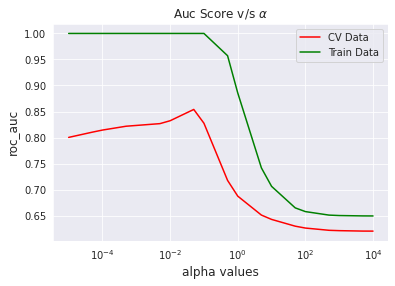

****************************************************************************************************


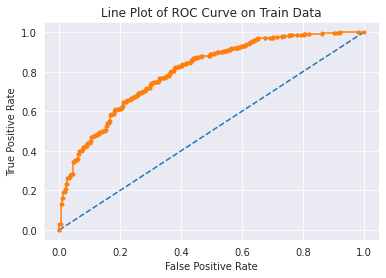

****************************************************************************************************


In [ ]:
best_alpha_bow = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)


AUC Score 0.8660599351757508
**********************************************************************


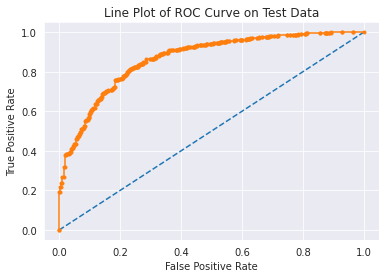

macro f1 score for data : 0.5709270636843122
micro f1 score for data: 0.8607461902259589
hamming loss for data: 0.13925380977404098
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.88      0.12      0.22       297
           1       0.86      1.00      0.92      1606

    accuracy                           0.86      1903
   macro avg       0.87      0.56      0.57      1903
weighted avg       0.86      0.86      0.81      1903

**********************************************************************


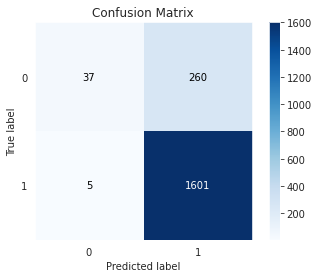

In [ ]:
NB_bow, roc_auc_bow = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_bow)


In [ ]:
Important_features(BOW, NB_bow)


,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,great,-5.335857,like,-6.069298
1,like,-5.365138,taste,-6.424328
2,good,-5.522427,would,-6.637728
3,love,-5.654779,one,-6.639733
4,one,-5.951090,product,-6.641032
...,...,...,...,...
133845,household items,-12.951182,person sick,-12.149642
133846,household like,-12.951182,person stop,-12.149642
133847,household one,-12.951182,person take,-12.149642
133848,toll free,-12.951182,person twice,-12.149642


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

TfIdf, X = Text_Into_Vector(TfidfVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (5764, 133850)
the number of unique words including both unigrams and bigrams  133850


In [ ]:
TfIdf.get_feature_names()[:20]


['aahhhs',
 'aahhhs get',
 'aback',
 'aback brand',
 'abates',
 'abates steeping',
 'abbott',
 'abbott laboratories',
 'abdominal',
 'abdominal symptoms',
 'abiding',
 'abiding childhood',
 'ability',
 'ability able',
 'ability adjust',
 'ability eat',
 'ability fully',
 'ability keep',
 'ability leave',
 'ability obtain']

In [ ]:
TfIdf.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])


In [ ]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (1903, 133850) (1903,)
X_tr, Y_tr (2586, 133850) (2586,)
X_cv, Y_cv (1275, 133850) (1275,)
X_Train, Y_Train (3861, 133850) (3861,)


In [ ]:
X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)


Train Data Size  (2586, 133850)
CV Data Size:  (1275, 133850)
Test Data Size:  (1903, 133850)


10000  ------>  0.65053871546105
5000  ------>  0.6505345263828148
1000  ------>  0.6506183079475192
500  ------>  0.6505638499304613
100  ------>  0.6513262621692721
50  ------>  0.6520551617822015
10  ------>  0.6593315906767875
5  ------>  0.6679569027631159
1  ------>  0.7137560951088323
0.5  ------>  0.7501549958947032
0.1  ------>  0.83466964929037
0.05  ------>  0.8280383384440089
0.01  ------>  0.7977219792556847
0.005  ------>  0.7950074565592586
0.001  ------>  0.7966202516798204
0.0005  ------>  0.796984701486285
0.0001  ------>  0.7940481576433921
5e-05  ------>  0.7915975468757854
1e-05  ------>  0.7840236934264984
****************************************************************************************************

 Best alpha Value 0.1 with highest roc_auc Score is 0.83466964929037
****************************************************************************************************


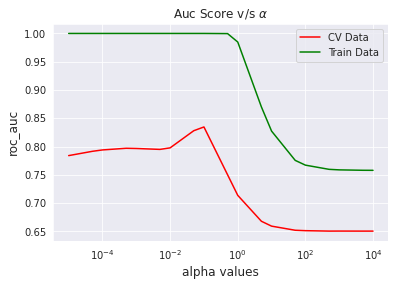

****************************************************************************************************


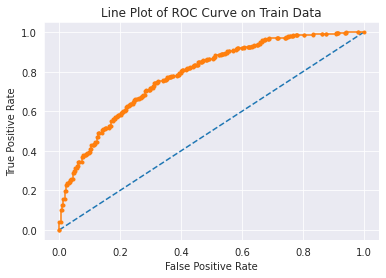

****************************************************************************************************


In [ ]:
best_alpha_idf = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)


AUC Score 0.8464742904344399
**********************************************************************


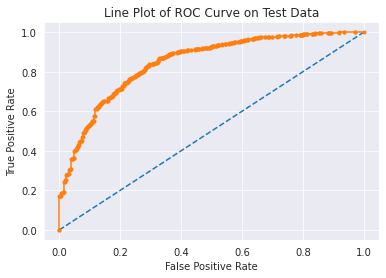

macro f1 score for data : 0.507413732073915
micro f1 score for data: 0.8512874408828166
hamming loss for data: 0.1487125591171834
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.94      0.05      0.10       297
           1       0.85      1.00      0.92      1606

    accuracy                           0.85      1903
   macro avg       0.89      0.52      0.51      1903
weighted avg       0.86      0.85      0.79      1903

**********************************************************************


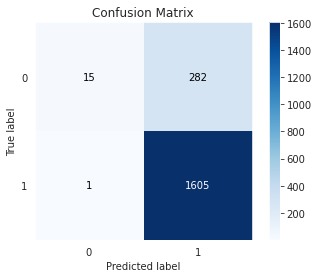

In [ ]:
NB_tfidf, roc_auc_idf = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_idf)


In [ ]:
Important_features(TfIdf, NB_tfidf)


,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,great,-6.577391,like,-7.683094
1,like,-6.703368,taste,-7.833529
2,good,-6.760984,product,-8.007092
3,love,-6.827184,would,-8.013000
4,coffee,-7.055080,one,-8.090158
...,...,...,...,...
133845,keep line,-12.523881,person sick,-11.989893
133846,keep long,-12.523881,person stop,-11.989893
133847,keep looking,-12.523881,person take,-11.989893
133848,keep love,-12.523881,person twice,-11.989893


In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperameter(alpha)","Test Auc Score"]

####################################################################################
x.add_row(["BoW","MultinomialNB",best_alpha_bow, roc_auc_bow])
x.add_row(["Tf-Idf","MultinomialNB",best_alpha_idf, roc_auc_idf])

####################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
####################################################################################
printmd('****Final Conclusion for MultiNomialNB Model:****')
print(x)

****Final Conclusion for MultiNomialNB Model:****

+------------+---------------+--------------------+--------------------+
| Vectorizer |     Model     | Hyperameter(alpha) |   Test Auc Score   |
+------------+---------------+--------------------+--------------------+
|    BoW     | MultinomialNB |        0.05        | 0.8660599351757508 |
|   Tf-Idf   | MultinomialNB |        0.1         | 0.8464742904344399 |
+------------+---------------+--------------------+--------------------+


In [ ]:
# Individual prediction
review = """Great, healthier alternative to the usual bhujia we Indians are used to having along with our tea or our beer.
            Much less salt than traditional tea snacks as well. I love the variety of texture as well with the very 
            crunchy peas to soft cheese bits, the sesame seed coated snack to good old roasted peanuts. It is pretty 
            expensive though, at 600rs at a kilo perhaps the most expensive tea snack Ive ever had."""

print("Prediction using BOW:", Individual_Prediction(BOW, NB_bow, review))
print("Prediction using TF-Idf:", Individual_Prediction(TfIdf, NB_tfidf, review))

[1]
Prediction using BOW: positive review
[1]
Prediction using TF-Idf: positive review


In [ ]:
review = "this place is dirty and food is horrible, bad, nasty, not good"
print("Prediction using BOW:", Individual_Prediction(BOW, NB_bow, review))
print("Prediction using TF-Idf:", Individual_Prediction(TfIdf, NB_tfidf, review))

[1]
Prediction using BOW: positive review
[1]
Prediction using TF-Idf: positive review


In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'CleanedText'],
      dtype='object')

In [ ]:
x_tri[x_tri["Score"]<3]

NameError: ignored